# Title: Machine Learning for Liver Disease Prediction using SVM and Naive Bayes

### 1. Introduction

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

The two classification algorithms to be used are: Support Vector Machines (SVM) and Naive Bayes.

### 2. Aim

The aim of this project is to develop and evaluate machine learning models for the early detection of liver disease using SVM and Naive Bayes classification techniques.

### 3. Objectives

Data Collection: Gather and preprocess the Indian Liver Patients Dataset.

Data Exploration: Explore and understand the dataset, including feature distributions and class imbalances.
Feature Engineering: Select relevant features and preprocess data as needed.

Model Selection: Implement SVM and Naive Bayes classifiers.

Model Training: Train and validate the models on the dataset.

Model Evaluation: Assess the models' performance using various evaluation metrics.

Hyperparameter Tuning: Optimize model parameters for better accuracy.

Model Comparison: Compare the performance of SVM and Naive Bayes models.
Documentation and Reporting: Create a comprehensive report of the project.

### 4. Tools Used

Programming Language: Python

Libraries: Scikit-Learn, Pandas, NumPy, Matplotlib, Seaborn

Development Environment: Jupyter Notebook / Google Colab

### 5. Description

Data Collection: The Indian Liver Patients Dataset is obtained from a reliable source. It contains various medical and demographic features of patients.

Data Preprocessing: Missing values, outliers, and inconsistencies in the dataset are handled. Data is split into training and testing sets.

Feature Engineering: Feature selection is performed to choose the most relevant features for classification. Feature scaling is applied to standardize the data.

Model Selection and Training: Support Vector Machines (SVM) and Naive Bayes classifiers are implemented. The models are trained on the training data.

Model Evaluation: Various evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC, are used to assess the models' performance. Cross-validation is applied to check for overfitting.

Hyperparameter Tuning: Grid search or random search techniques are employed to fine-tune the model hyperparameters.

Model Comparison: The performance of SVM and Naive Bayes models is compared in terms of accuracy, interpretability, and computational complexity.

Documentation and Reporting: A detailed report is created, summarizing the approach, findings, and model performance. Key insights and visualizations are included.

### Data Preprocessing

In [ ]:
#importing libraries
import numpy as np
import pandas as pd

In [ ]:
#importing dataset
dataset=pd.read_csv('/content/indian_liver_patient.csv')
X=dataset.iloc[:,:-2].values#independet variable matrix
y=dataset.iloc[:,-1].values#dependent variable vector

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#Handling missing data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,2:11])
X[:,2:11]=imputer.transform(X[:,2:11])

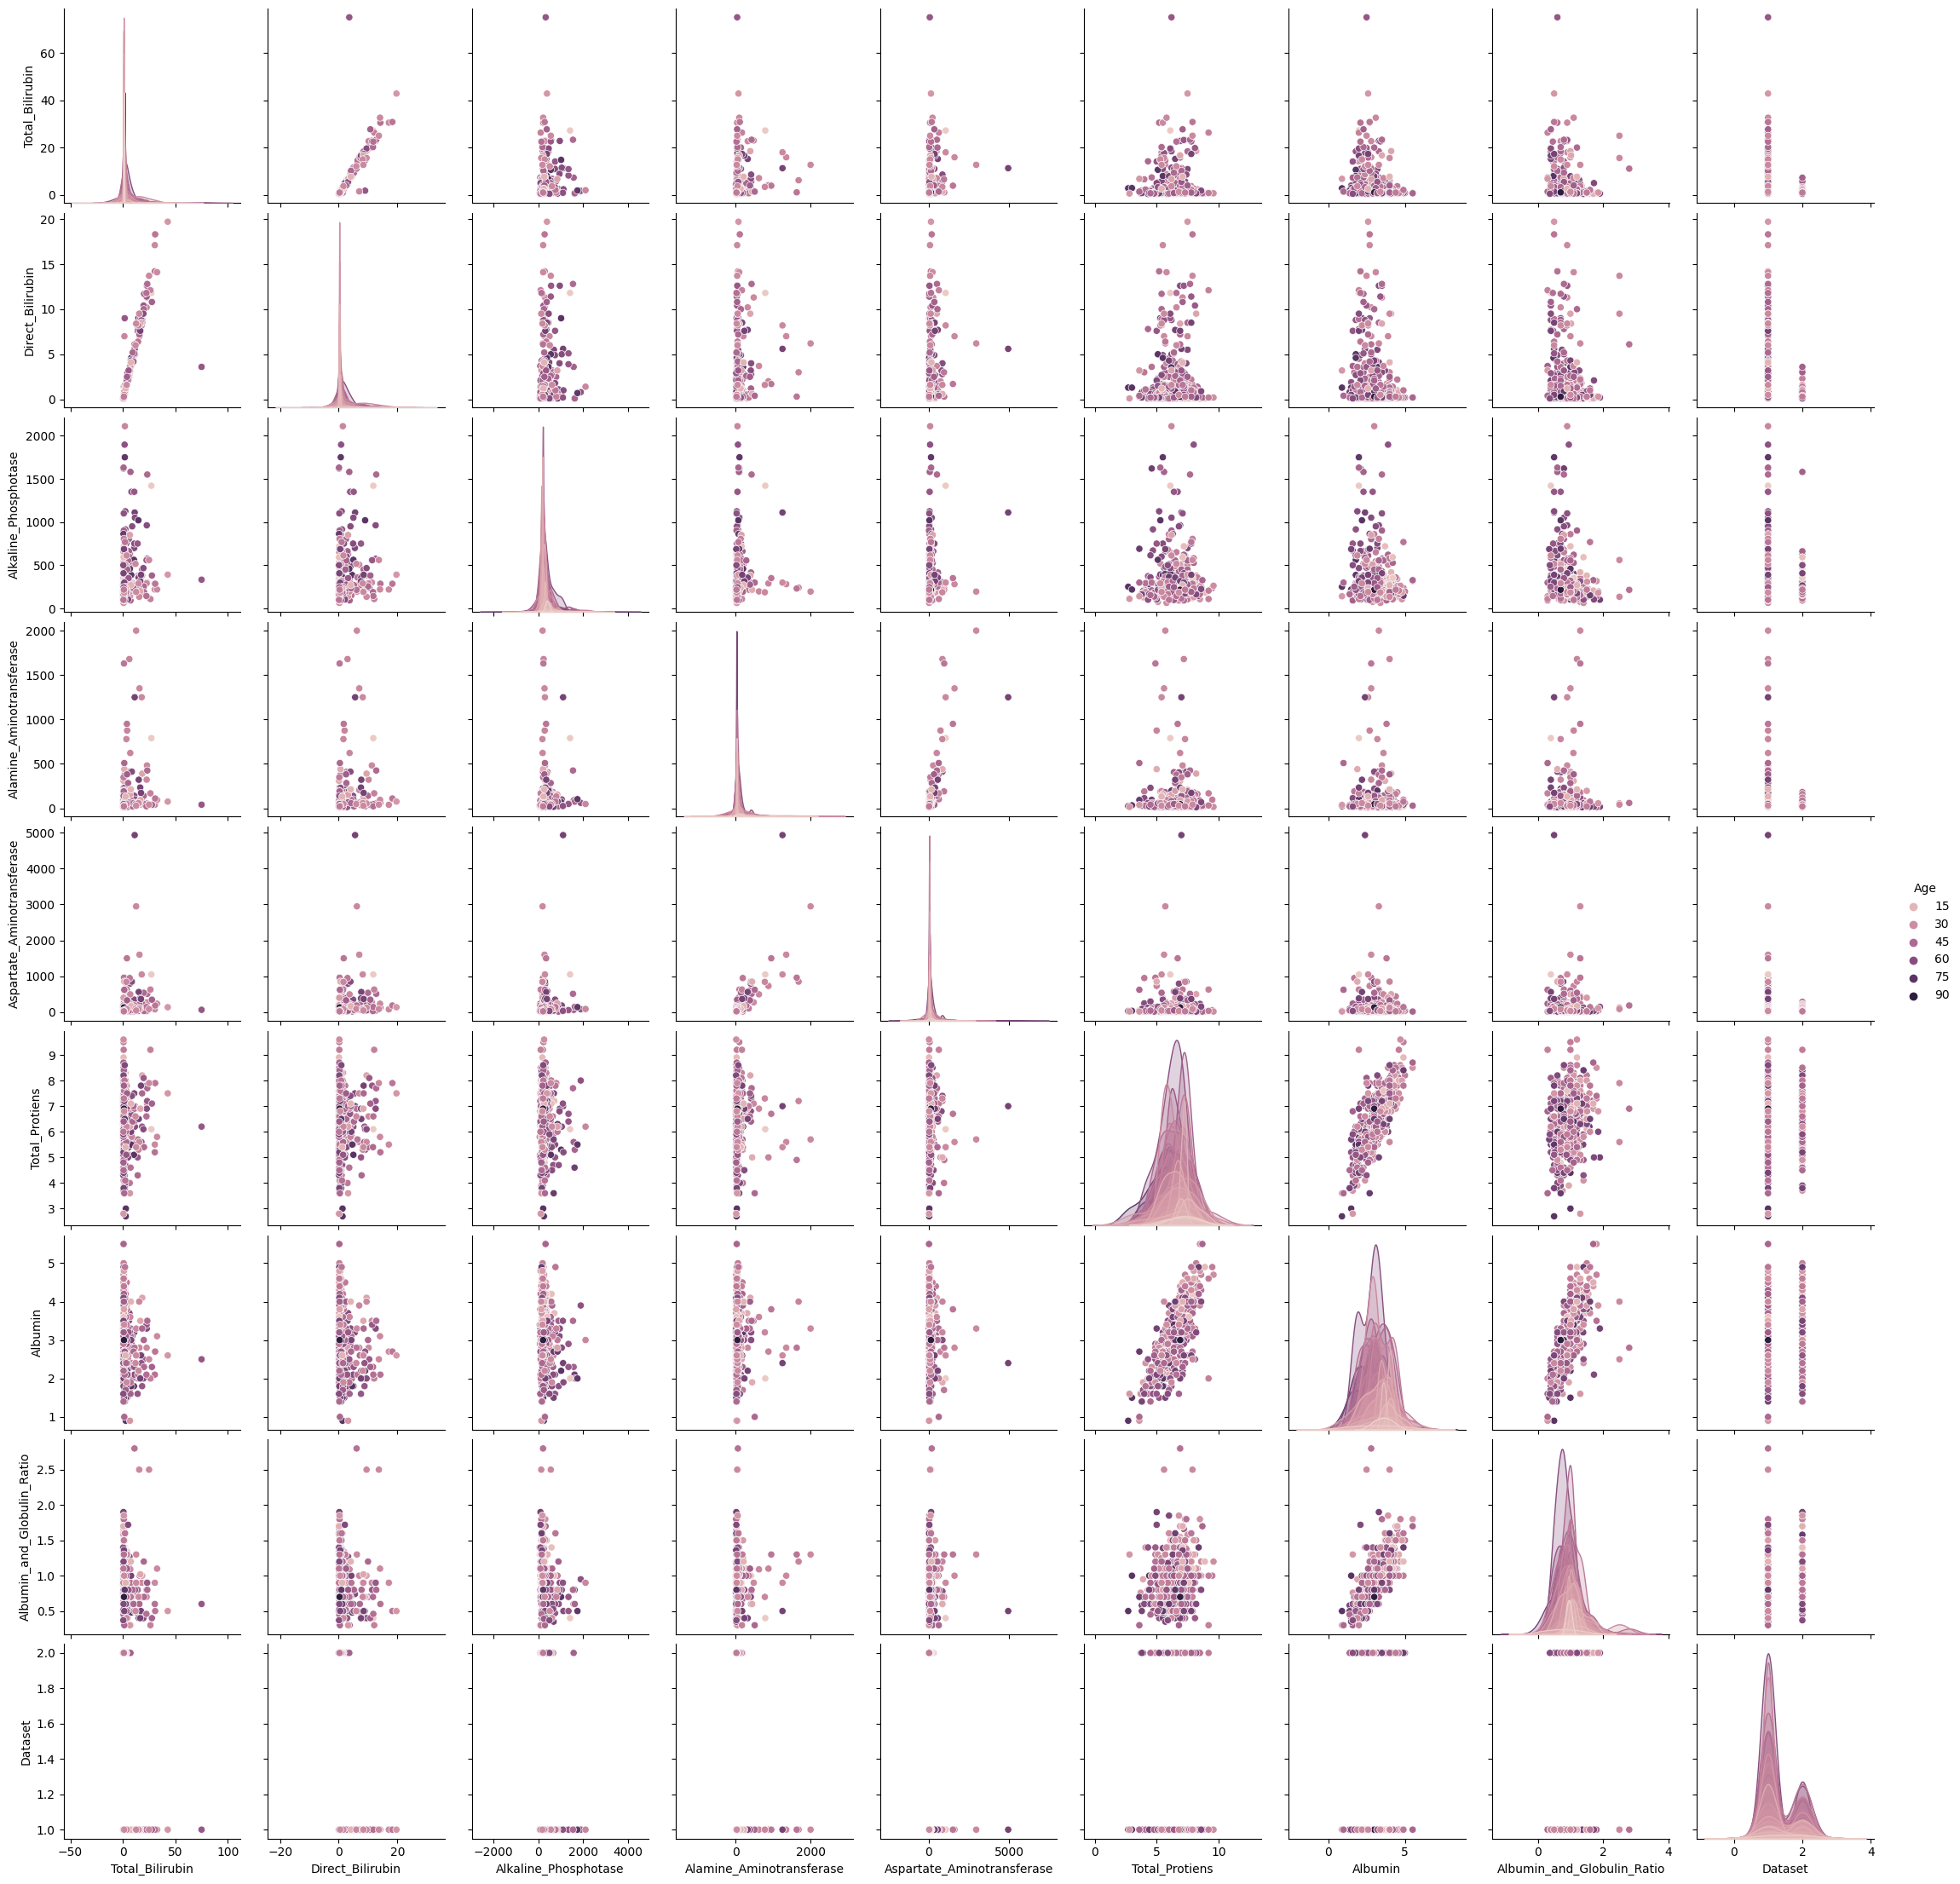

In [ ]:
# importing packages
import seaborn
import matplotlib.pyplot as plt


# pairplot with hue age
seaborn.pairplot(dataset, hue ='Age')
# to show
plt.show()

In [ ]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],remainder='passthrough')
X = ct.fit_transform(X)

labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [ ]:
#Spliting dataset into training set and testing test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
X

array([[1.0, 0.0, 58, ..., 18.0, 6.8, 3.3],
       [0.0, 1.0, 55, ..., 100.0, 7.5, 3.2],
       [0.0, 1.0, 55, ..., 68.0, 7.0, 3.3],
       ...,
       [0.0, 1.0, 46, ..., 49.0, 6.4, 3.2],
       [0.0, 1.0, 25, ..., 32.0, 6.8, 3.4],
       [0.0, 1.0, 32, ..., 24.0, 7.3, 4.4]], dtype=object)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

#SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
clf = svm.SVC(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6666666666666666


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[78  0]
 [39  0]]


# Naive Bayes

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
X=dataset.iloc[:,2:-2].values#independet variable matrix
y=dataset.iloc[:,-1].values#dependent variable vector

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

In [ ]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

In [ ]:
#classification_report
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.5128205128205128


In [ ]:
print("Classification Report :\n", report)

Classification Report :
               precision    recall  f1-score   support

           1       1.00      0.34      0.51        87
           2       0.34      1.00      0.51        30

    accuracy                           0.51       117
   macro avg       0.67      0.67      0.51       117
weighted avg       0.83      0.51      0.51       117



### 6. Output

The primary output of this project is a well-documented report detailing the performance of SVM and Naive Bayes models for liver disease prediction. The report includes accuracy scores, classification reports, and visualizations that help in understanding the results.